In [1]:
import pandas as pd

In [12]:
res_ds_regr = pd.read_csv('evaluation_regr_full1.csv', index_col=0)
print(res_ds_regr.shape)
res_ds_regr.head()

(200, 20)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_mse_train,metric_mse_test,metric_mae_train,metric_mae_test,metric_r2_train,metric_r2_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo,metric_wape_train,metric_wape_test
0,DecisionTreeRegressor,calhouse,0,16512,4128,0.151587,42,1.051528e-31,0.793655,4.867984e-17,0.623827,1.000000,0.261216,NaN,NaN,NaN,NaN,NaN,2.248564e-17,0.370648
1,RandomForestRegressor,calhouse,0,16512,4128,0.277177,42,2.019904e-01,0.599036,3.110937e-01,0.580684,0.850314,0.442380,5.0,10.0,NaN,NaN,NaN,1.436969e-01,0.345015
2,RandomForestRegressor,calhouse,0,16512,4128,9.033681,42,3.465075e-02,0.521694,1.203863e-01,0.543827,0.974322,0.514374,NaN,NaN,NaN,NaN,NaN,5.560749e-02,0.323116
3,GradientBoostingRegressor,calhouse,0,16512,4128,2.807599,42,2.649648e-01,0.427120,3.613307e-01,0.523329,0.803647,0.602410,NaN,NaN,NaN,NaN,NaN,1.669018e-01,0.310937
4,LGBMRegressor,calhouse,0,16512,4128,200.734206,42,1.627876e-01,0.370611,2.791399e-01,0.446897,0.879366,0.655012,NaN,NaN,NaN,NaN,NaN,1.289371e-01,0.265525


In [13]:
res_ds = res_ds_regr

In [14]:
import json

In [15]:
res_ds['model_base'] = [x.replace('Regressor','').replace('Classifier', '') for x in res_ds['model']]

flg = res_ds['param_n_estimators'].isna()
res_ds.loc[flg, 'param_n_estimators'] = [
    json.loads(x.replace("'", '"'))['rf_params']['n_estimators']
    if x is not None and type(x)==str and 'rf_params' in x else None for x in res_ds.loc[flg, 'param_algo_params']]

res_ds['model'] = res_ds['model_base']+'_'+res_ds['param_algo'].fillna('')+'_'+res_ds['param_n_estimators'].fillna('').astype(str)
res_ds['model'] = res_ds['model']+'_'+res_ds['param_gen_algo'].replace('approximate','approx.').fillna('')

In [16]:
for s_from, s_to in [
    ('DecisionTree', 'DT'), ('GradientBoosting', 'GB'), ('CatBoost', "CB"),
    ('DecisionLattice', 'DL'), ('RandomForest', 'RF'), ('.0','',),
    ('__','_')
]:
    res_ds['model'] = [x.replace(s_from, s_to).strip('_') for x in res_ds['model']]


In [22]:
res_ds[(res_ds['model']=='DT')&(res_ds['ds']=='calhouse')]

,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_mse_train,metric_mse_test,metric_mae_train,...,metric_r2_train,metric_r2_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo,metric_wape_train,metric_wape_test,model_base
0,DT,calhouse,0,16512,4128,0.151587,42,1.051528e-31,0.793655,4.867984e-17,...,1.0,0.261216,None,NaN,NaN,NaN,NaN,2.248564e-17,0.370648,DecisionTree
10,DT,calhouse,1,16512,4128,0.148657,42,8.265076e-32,0.753532,3.711501e-17,...,1.0,0.356265,None,NaN,NaN,NaN,NaN,1.823949e-17,0.265387,DecisionTree
20,DT,calhouse,2,16512,4128,0.147281,42,6.903488e-32,0.805027,3.361867e-17,...,1.0,0.440383,None,NaN,NaN,NaN,NaN,1.684901e-17,0.263498,DecisionTree
30,DT,calhouse,3,16512,4128,0.151132,42,7.620114e-32,0.909096,3.921282e-17,...,1.0,0.225104,None,NaN,NaN,NaN,NaN,1.843549e-17,0.350745,DecisionTree
40,DT,calhouse,4,16512,4128,0.137475,42,6.660060e-32,0.860726,3.272442e-17,...,1.0,0.409312,None,NaN,NaN,NaN,NaN,1.619483e-17,0.286560,DecisionTree


In [57]:
res_ds = res_ds[res_ds['param_gen_algo'].isna()]
res_ds = res_ds[res_ds['param_algo']!='Sofia']

In [58]:
metric = 'metric_wape_train'
s = res_ds.groupby(['model', 'ds'])[metric].mean().reset_index().groupby('model')[metric].mean()
s = s.sort_values(ascending=True)

In [69]:
res_ds['param_algo'].unique()

array([nan, 'RandomForest', 'Sofia'], dtype=object)

In [59]:
import seaborn as sns

In [60]:
import matplotlib.pyplot as plt

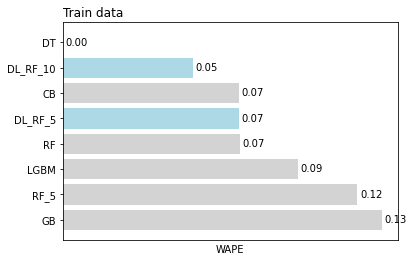

In [77]:
metric = 'metric_wape_train'
s = res_ds.groupby(['model', 'ds'])[metric].mean().reset_index().groupby('model')[metric].mean()
s = s.sort_values(ascending=True)

plt.barh(s.index, s.values,
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in s.index])
plt.gca().invert_yaxis()
for idx, v in enumerate(s.values):
    plt.text(v+0.001, idx+0.1, f"{v:.2f}")
plt.title('Train data', loc='left')
plt.xticks([])
plt.xlabel('WAPE')
plt.show()

In [91]:
rename_dict= {'CB':'CatBoost',
          'LGBM':'LightGBM',
          'GB':'Sklearn Grad. Boosting',
          'RF':'Sklearn Rand. Forest',
          'RF_5': 'Sklearn Rand. Forest (5 trees)',
          'DL_RF_10': 'FCA Decision Lattice (10 trees)',
          'DL_RF_5': 'FCA Decision Lattice (5 trees)',
          'DT': 'Sklearn Decision Tree',
         }

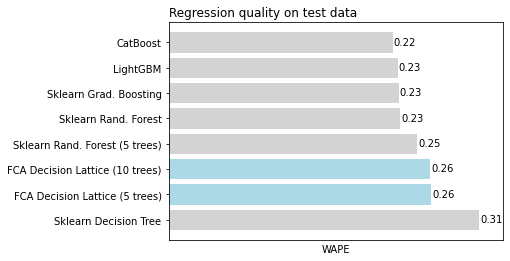

In [93]:
metric = 'metric_wape_test'
s = res_ds.groupby(['model', 'ds'])[metric].mean().reset_index().groupby('model')[metric].mean()
s = s.sort_values(ascending=True)

plt.barh(s.rename(rename_dict).index, s.values,
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in s.index])
plt.gca().invert_yaxis()
for idx, v in enumerate(s.values):
    plt.text(v+0.001, idx+0.1, f"{v:.2f}")
plt.title('Regression quality on test data', loc='left')
plt.xticks([])
plt.xlabel('WAPE')
plt.xlim((0, 0.33))
plt.show()

In [95]:
res_ds_clf = pd.read_csv('evaluation_classif_full.csv', index_col=0)
print(res_ds_clf.shape)
res_ds_clf.head()

(480, 18)


,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_accuracy_train,metric_accuracy_test,metric_f1_train,metric_f1_test,metric_roc_train,metric_roc_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo
0,DecisionTreeClassifier,adult,0,26048,6513,0.105370,42,0.999578,0.787502,0.999122,0.564780,0.999123,0.713776,NaN,NaN,NaN,NaN,NaN
1,RandomForestClassifier,adult,0,26048,6513,0.087283,42,0.850392,0.829418,0.634462,0.579326,0.744208,0.712558,5.0,10.0,NaN,NaN,NaN
2,RandomForestClassifier,adult,0,26048,6513,2.493777,42,0.999539,0.826961,0.999043,0.609629,0.999370,0.735879,NaN,NaN,NaN,NaN,NaN
3,GradientBoostingClassifier,adult,0,26048,6513,2.102144,42,0.849048,0.838323,0.645957,0.622174,0.754491,0.740548,NaN,NaN,NaN,NaN,NaN
4,LGBMClassifier,adult,0,26048,6513,308.169476,42,0.865748,0.841701,0.694665,0.641641,0.786789,0.754919,NaN,NaN,NaN,NaN,NaN


In [96]:
res_ds = res_ds_clf

In [97]:
import json

In [98]:
res_ds['model_base'] = [x.replace('Regressor','').replace('Classifier', '') for x in res_ds['model']]

flg = res_ds['param_n_estimators'].isna()
res_ds.loc[flg, 'param_n_estimators'] = [
    json.loads(x.replace("'", '"'))['rf_params']['n_estimators']
    if x is not None and type(x)==str and 'rf_params' in x else None for x in res_ds.loc[flg, 'param_algo_params']]

res_ds['model'] = res_ds['model_base']+'_'+res_ds['param_algo'].fillna('')+'_'+res_ds['param_n_estimators'].fillna('').astype(str)
res_ds['model'] = res_ds['model']+'_'+res_ds['param_gen_algo'].replace('approximate','approx.').fillna('')

In [99]:
for s_from, s_to in [
    ('DecisionTree', 'DT'), ('GradientBoosting', 'GB'), ('CatBoost', "CB"),
    ('DecisionLattice', 'DL'), ('RandomForest', 'RF'), ('.0','',),
    ('__','_')
]:
    res_ds['model'] = [x.replace(s_from, s_to).strip('_') for x in res_ds['model']]


In [100]:
res_ds[(res_ds['model']=='DT')&(res_ds['ds']=='calhouse')]

,model,ds,fold_id,train_size,test_size,time,param_random_state,metric_accuracy_train,metric_accuracy_test,metric_f1_train,metric_f1_test,metric_roc_train,metric_roc_test,param_n_estimators,param_max_depth,param_algo,param_algo_params,param_gen_algo,model_base


In [101]:
res_ds = res_ds[res_ds['param_gen_algo'].isna()]
res_ds = res_ds[res_ds['param_algo']!='Sofia']

In [104]:
metric = 'metric_f1_train'
s = res_ds.groupby(['model', 'ds'])[metric].mean().reset_index().groupby('model')[metric].mean()
s = s.sort_values(ascending=True)

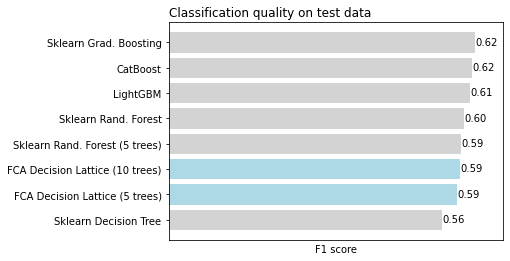

In [112]:
metric = 'metric_f1_test'
s = res_ds.groupby(['model', 'ds'])[metric].mean().reset_index().groupby('model')[metric].mean()
s = s.sort_values(ascending=False)

plt.barh(s.rename(rename_dict).index, s.values,
         color=['lightblue' if x.startswith('DL') else 'lightgrey' for x in s.index])
plt.gca().invert_yaxis()
for idx, v in enumerate(s.values):
    plt.text(v+0.001, idx+0.1, f"{v:.2f}")
plt.title('Classification quality on test data', loc='left')
plt.xticks([])
plt.xlabel('F1 score')
plt.xlim((0, 0.68))
plt.show()